# Linear Regression

## Jorge Alberto Padilla Gutierrez

# Imports

In [44]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Algorithm

Text(0.5, 1.0, 'Data Set')

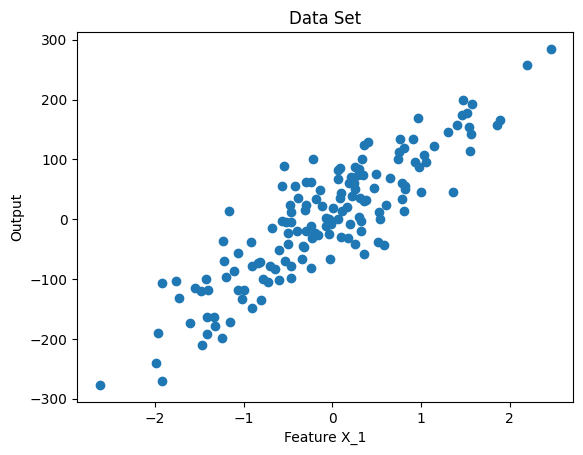

In [45]:
X, y = make_regression(n_samples=150, n_features=1, noise=50, random_state=42)
plt.scatter(X,y)
plt.xlabel('Feature X_1')
plt.ylabel('Output')
plt.title('Data Set')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(120, 1)
(120,)


# Model

In [47]:
class LinearReg:
    # Hyperparametrers
    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        # Matrix dimentions
        # m = rows
        # n = columns
        m, n = X.shape

        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        # We need to reshape y to be a column vector
        y = y.reshape(m, 1)

        losses = list()
        b_list = list()
        w_list = list()

        # Gradient Descent
        for epoch in range(self.epochs):
            # Calculate Prediction
            y_hat = np.dot(X, self.weights) + self.bias

            # Get loss - L - J
            loss = self.mse(y, y_hat)          # Mean Square Error
            losses.append(loss)

            # Calculate gradient
            dw = (-2 / m) * np.dot(X.T, (y - y_hat))
            db = (-2 / m) * np.sum((y - y_hat))
            
            # upgrade parames
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            w_list.append(self.weights)
            b_list.append(self.bias)

            print(f"epoch: {epoch}, loss: {loss}, w: {self.weights}, b: {self.bias}")

        return self.weights, self.bias, losses, w_list, b_list
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def mse(self, y, y_hat):
        return np.mean((y - y_hat)**2)

In [48]:
model = LinearReg(lr=0.1,epochs=50)
w, b, losses, w_list, b_list = model.fit(X_train, y_train)

epoch: 0, loss: 11293.377067291236, w: [[18.65946333]], b: [0.5400028]
epoch: 1, loss: 8220.322537716163, w: [[33.55216437]], b: [0.52443892]
epoch: 2, loss: 6215.171781948626, w: [[45.58765674]], b: [0.75734873]
epoch: 3, loss: 4904.630944390473, w: [[55.31814883]], b: [1.14196426]
epoch: 4, loss: 4046.6756460008187, w: [[63.18832145]], b: [1.60996894]
epoch: 5, loss: 3484.11255067292, w: [[69.55642421]], b: [2.1140357]
epoch: 6, loss: 3114.666942569951, w: [[74.71120192]], b: [2.62220517]
epoch: 7, loss: 2871.6809549034924, w: [[78.88548128]], b: [3.11366697]
epoch: 8, loss: 2711.636384203063, w: [[82.26708164]], b: [3.57560869]
epoch: 9, loss: 2606.0747227457896, w: [[85.00758081]], b: [4.00087476]
epoch: 10, loss: 2536.3554490186793, w: [[87.22936068]], b: [4.38623802]
epoch: 11, loss: 2490.249587329224, w: [[89.03127272]], b: [4.73113299]
epoch: 12, loss: 2459.7221003328846, w: [[90.49319587]], b: [5.03673591]
epoch: 13, loss: 2439.485738073856, w: [[91.6797048]], b: [5.30530379]


Text(0, 0.5, 'loss')

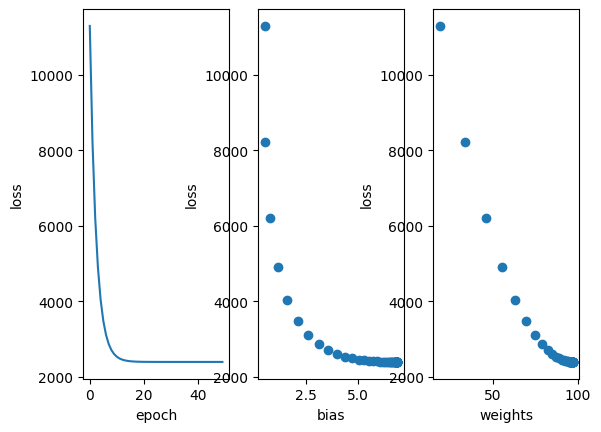

In [49]:
plt.subplot(1,3,1)
plt.plot(np.arange(len(losses)), losses)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,3,2)
plt.scatter(b_list, losses)
plt.xlabel('bias')
plt.ylabel('loss')

plt.subplot(1,3,3)
plt.scatter(w_list, losses)
plt.xlabel('weights')
plt.ylabel('loss')

In [50]:
y_predicted = model.predict(X_test)

# Results

Text(0.5, 1.0, 'Data Set')

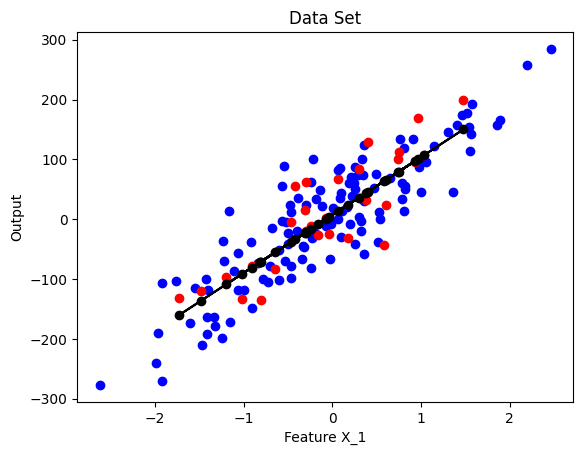

In [51]:
plt.scatter(X_train,y_train, color='blue')
plt.scatter(X_test,y_test, color='red')
plt.scatter(X_test,y_predicted, color='black')
plt.plot(X_test,y_predicted, color='black')
plt.xlabel('Feature X_1')
plt.ylabel('Output')
plt.title('Data Set')

In [52]:
print(f"Loss: {losses[-1]}, weight: {w}, bias: {b}")

Loss: 2399.33721583719, weight: [[96.83493706]], bias: [6.89997448]


lr = 0.1

epochs = 50

loss = 2399.3372162296214

# Test MSE

In [53]:
# We need to reshape y to be a column vector
m, n = X_test.shape
y_test_reshape = y_test.reshape(m, 1)
mse_test = model.mse(y_test_reshape, y_predicted)
print(f"MSE of test set: {mse_test}")

MSE of test set: 2121.5707187799007


Test loss = 2121.5707187799007

Text(0.5, 1.0, 'Data Set')

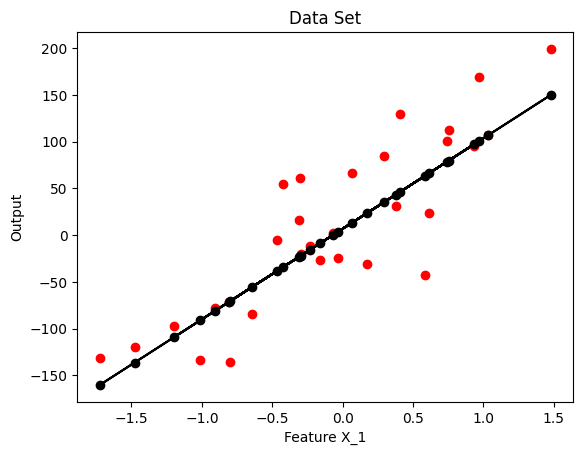

In [54]:
plt.scatter(X_test,y_test_reshape, color='red')
plt.scatter(X_test,y_predicted, color='black')
plt.plot(X_test,y_predicted, color='black')
plt.xlabel('Feature X_1')
plt.ylabel('Output')
plt.title('Data Set')